## Regression

In [1]:
from sklearn.datasets import make_regression
from kiwigrad import MLP, Layer, Value
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import time
import pandas as pd
%matplotlib inline

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
inputs = [[Value(i) for i in elem] for elem in X]
inputs[0]

[Value(data=0.959271, grad=0.000000),
 Value(data=0.024510, grad=0.000000),
 Value(data=0.497998, grad=0.000000),
 Value(data=1.451144, grad=0.000000),
 Value(data=2.153182, grad=0.000000)]

### Multi layer perceptron

In [4]:
class PotNet(MLP):
    def __init__(self):
        layers = [
            Layer(nin=5, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=1, bias=True, activation="linear")
        ]
        super().__init__(layers=layers)

model = PotNet()
y_pred = model(inputs[0])
print(y_pred)

Value(data=0.225683, grad=0.000000)


### Full batch gradient descent with squared error loss

Squared error (squared L2 norm):

$$ l(x,y) = L = (\hat{y}_i - y_i)^2$$



In [5]:
epochs = 100
for epoch in range(epochs):
    y_pred = []
    s = time.monotonic()
    for i in range(len(inputs)):
        output = model(inputs[i])
        y_pred.append(output.data)
        target = Value(y[i])
        loss = (output - target) ** 2
        #loss = (output - target) * (output - target)
        loss.backward()
        for p in model.parameters():
            p.data += -0.00001 * p.grad
        model.zero_grad()
    e = time.monotonic()
    t = e - s
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0:
        print(f"epoch: {epoch} | loss: {loss.data:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 0 | loss: 641.71 | R2: 0.04 | time: 0.08 sec.
epoch: 10 | loss: 118.05 | R2: 0.99 | time: 0.08 sec.
epoch: 20 | loss: 22.22 | R2: 1.00 | time: 0.08 sec.
epoch: 30 | loss: 5.75 | R2: 1.00 | time: 0.07 sec.
epoch: 40 | loss: 3.49 | R2: 1.00 | time: 0.08 sec.
epoch: 50 | loss: 3.41 | R2: 1.00 | time: 0.08 sec.
epoch: 60 | loss: 3.70 | R2: 1.00 | time: 0.08 sec.
epoch: 70 | loss: 3.89 | R2: 1.00 | time: 0.08 sec.
epoch: 80 | loss: 3.74 | R2: 1.00 | time: 0.08 sec.
epoch: 90 | loss: 3.62 | R2: 1.00 | time: 0.08 sec.


### Result

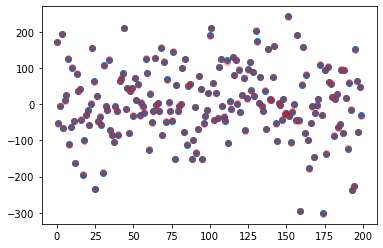

In [6]:
x = [i for i in range(len(inputs))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()

### Save & load the trainend model 

In [7]:
model.save()

In [8]:
new_model = PotNet()
new_model.load(path="weights.pkl")
idx = 0
new_y_pred = new_model(inputs[idx])
print(f"y_pred: {new_y_pred.data:.2f}, y_true: {y[idx]:.2f}")

y_pred: 171.05, y_true: 172.54


## Real Data

In [7]:
X = pd.read_csv("data/x.csv", sep=";")
print(X.shape)
X.head()

(414, 6)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [8]:
Xn = X.to_numpy().tolist()
inputs = [[Value(i) for i in elem] for elem in Xn]
inputs[0]

[Value(data=-0.823683, grad=0.000000),
 Value(data=1.255628, grad=0.000000),
 Value(data=-0.792495, grad=0.000000),
 Value(data=2.007407, grad=0.000000),
 Value(data=1.125430, grad=0.000000),
 Value(data=0.448762, grad=0.000000)]

In [9]:
y = pd.read_csv("data/y.csv", sep=";")
y = y.to_numpy().squeeze()
print(y.shape)

(414,)


In [10]:
class PotNet(MLP):
    def __init__(self):
        layers = [
            Layer(nin=6, nout=16, bias=True, activation="relu"),
            Layer(nin=16, nout=1, bias=True, activation="linear")
        ]
        super().__init__(layers=layers)

model = PotNet()
y_pred = model(inputs[0])
print(y_pred)

Value(data=1.669907, grad=0.000000)


In [11]:
epochs = 200
for epoch in range(epochs):
    y_pred = []
    s = time.monotonic()
    for i in range(len(inputs)):
        output = model(inputs[i])
        y_pred.append(output.data)
        target = Value(y[i])
        loss = (output - target) ** 2
        #loss = (output - target) * (output - target)
        loss.backward()
        for p in model.parameters():
            p.data += -0.00001 * p.grad
        model.zero_grad()
    e = time.monotonic()
    t = e - s
    r2 = r2_score(y, y_pred)
    if epoch % 10 ==0 and epoch != 0:
        print(f"epoch: {epoch} | loss: {loss.data:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

epoch: 10 | loss: 49.94 | R2: 0.60 | time: 0.06 sec.
epoch: 20 | loss: 62.07 | R2: 0.64 | time: 0.05 sec.
epoch: 30 | loss: 63.64 | R2: 0.65 | time: 0.06 sec.
epoch: 40 | loss: 64.14 | R2: 0.66 | time: 0.06 sec.
epoch: 50 | loss: 64.46 | R2: 0.66 | time: 0.06 sec.
epoch: 60 | loss: 64.67 | R2: 0.67 | time: 0.08 sec.
epoch: 70 | loss: 65.18 | R2: 0.67 | time: 0.06 sec.
epoch: 80 | loss: 65.75 | R2: 0.67 | time: 0.06 sec.
epoch: 90 | loss: 66.46 | R2: 0.67 | time: 0.06 sec.
epoch: 100 | loss: 67.15 | R2: 0.68 | time: 0.06 sec.
epoch: 110 | loss: 67.92 | R2: 0.68 | time: 0.05 sec.
epoch: 120 | loss: 67.75 | R2: 0.68 | time: 0.06 sec.
epoch: 130 | loss: 68.46 | R2: 0.68 | time: 0.06 sec.
epoch: 140 | loss: 68.69 | R2: 0.68 | time: 0.06 sec.
epoch: 150 | loss: 69.21 | R2: 0.69 | time: 0.06 sec.
epoch: 160 | loss: 69.71 | R2: 0.69 | time: 0.06 sec.
epoch: 170 | loss: 70.51 | R2: 0.69 | time: 0.05 sec.
epoch: 180 | loss: 71.18 | R2: 0.69 | time: 0.06 sec.
epoch: 190 | loss: 71.61 | R2: 0.69 |

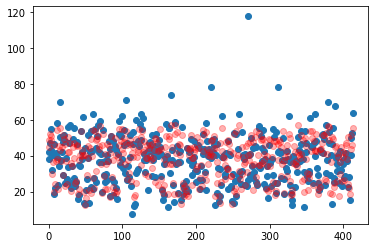

In [12]:
x = [i for i in range(len(inputs))]
# y true
plt.scatter(x, y)
# y pred
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()